# 📊 Hedge Fund Investment Analysis: Real Estate Leverage & Profitability
## Executive Summary Notebook

**Objective**: Analyze the relationship between leverage and profitability across industries, with a specific focus on real estate companies to inform strategic investment decisions.

**Key Questions**:
1. Are highly leveraged real estate companies more profitable?
2. How does real estate performance compare to technology and FMCG sectors?
3. What are the risk-adjusted return opportunities in real estate?

---

## 1. Setup & Data Import

We'll leverage the processing pipeline from `financial_analysis.py` and focus on deep-dive analysis and visualization.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import json
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load processed data from financial_analysis.py output
df = pd.read_csv('processed_financial_data.csv')
industry_summary = pd.read_csv('industry_summary.csv', index_col=0)
real_est_summary = pd.read_csv('real_est_company_summary.csv', index_col=0)
real_est_trend = pd.read_csv('real_est_trend.csv', index_col=0)
industry_trend = pd.read_csv('industry_trend.csv')

with open('summary_stats.json', 'r') as f:
    summary_stats = json.load(f)

print(f"✓ Data loaded successfully")
print(f"  • Total companies analyzed: {summary_stats['total_companies']}")
print(f"  • Total observations: {summary_stats['total_observations']}")
print(f"  • Analysis period: {summary_stats['year_range']}")
print(f"  • Real estate companies: {summary_stats['real_est_companies']}")

✓ Data loaded successfully
  • Total companies analyzed: 15
  • Total observations: 60
  • Analysis period: 2018-2022
  • Real estate companies: 5


---
## 2. Cross-Industry Performance Overview

Let's establish the competitive landscape before diving into real estate specifics.

In [3]:
# Industry summary table with formatted display
display_cols = ['Gross_Margin', 'Operating_Margin', 'ROE_Operating', 'Debt_to_Equity', 'Debt_to_Assets']
industry_display = industry_summary[display_cols].copy()
industry_display.columns = ['Gross Margin (%)', 'Operating Margin (%)', 'ROE (%)', 'Debt-to-Equity', 'Debt-to-Assets']

print("\n📈 INDUSTRY PERFORMANCE METRICS (Averages)")
print("="*80)
print(industry_display.to_string())
print("="*80)


📈 INDUSTRY PERFORMANCE METRICS (Averages)
                            Gross Margin (%)  Operating Margin (%)  ROE (%)  Debt-to-Equity  Debt-to-Assets
Industry                                                                                                   
Fast-Moving Consumer Goods             51.44                 20.71    52.80            3.00            0.71
Real Estate                            53.48                 29.99    43.91            5.69            0.71
Technology                             57.21                 27.39    53.41            1.78            0.52


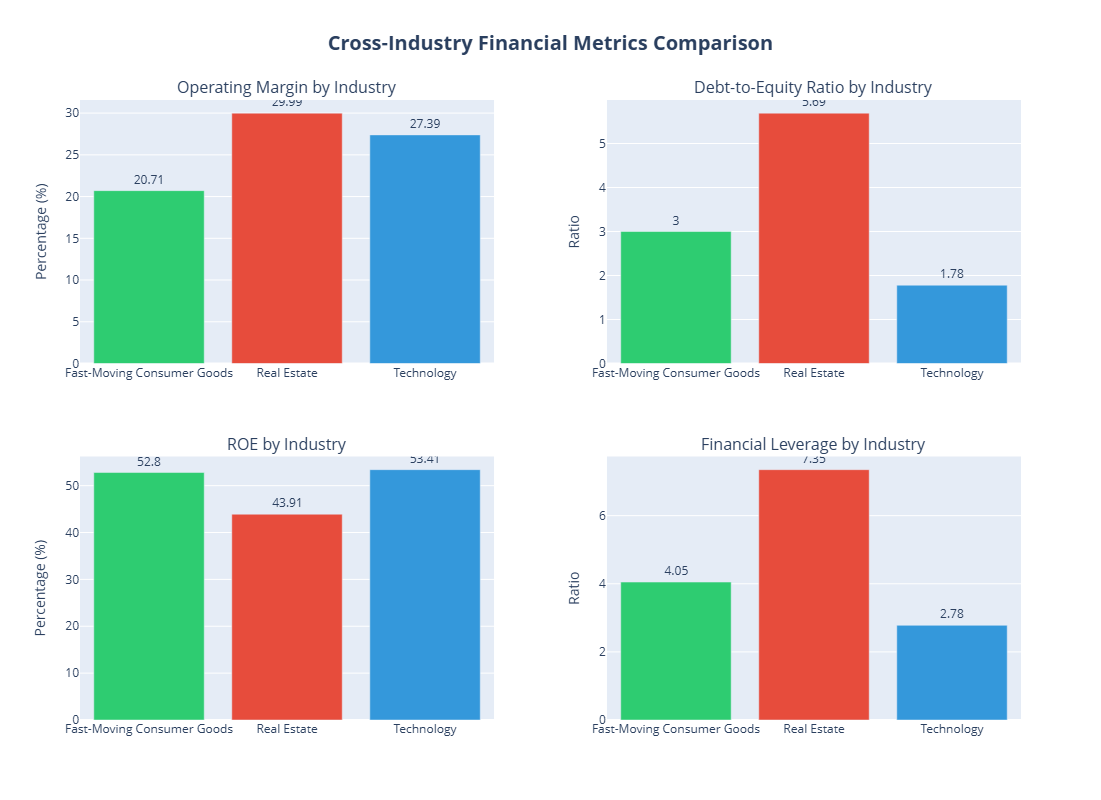

In [4]:
# Multi-metric industry comparison visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Operating Margin by Industry', 'Debt-to-Equity Ratio by Industry',
                    'ROE by Industry', 'Financial Leverage by Industry'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

colors = {'Technology': '#3498db', 'Fast-Moving Consumer Goods': '#2ecc71', 'Real Estate': '#e74c3c'}

# Operating Margin
fig.add_trace(
    go.Bar(x=industry_summary.index, y=industry_summary['Operating_Margin'],
           marker_color=[colors[ind] for ind in industry_summary.index],
           text=industry_summary['Operating_Margin'].round(2),
           textposition='outside',
           name='Operating Margin'),
    row=1, col=1
)

# Debt-to-Equity
fig.add_trace(
    go.Bar(x=industry_summary.index, y=industry_summary['Debt_to_Equity'],
           marker_color=[colors[ind] for ind in industry_summary.index],
           text=industry_summary['Debt_to_Equity'].round(2),
           textposition='outside',
           name='Debt-to-Equity'),
    row=1, col=2
)

# ROE
fig.add_trace(
    go.Bar(x=industry_summary.index, y=industry_summary['ROE_Operating'],
           marker_color=[colors[ind] for ind in industry_summary.index],
           text=industry_summary['ROE_Operating'].round(2),
           textposition='outside',
           name='ROE'),
    row=2, col=1
)

# Financial Leverage
fig.add_trace(
    go.Bar(x=industry_summary.index, y=industry_summary['Financial_Leverage'],
           marker_color=[colors[ind] for ind in industry_summary.index],
           text=industry_summary['Financial_Leverage'].round(2),
           textposition='outside',
           name='Financial Leverage'),
    row=2, col=2
)

fig.update_yaxes(title_text="Percentage (%)", row=1, col=1)
fig.update_yaxes(title_text="Ratio", row=1, col=2)
fig.update_yaxes(title_text="Percentage (%)", row=2, col=1)
fig.update_yaxes(title_text="Ratio", row=2, col=2)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="<b>Cross-Industry Financial Metrics Comparison</b>",
    title_x=0.5,
    title_font_size=20
)

fig.show()

### 💡 Key Insights: Cross-Industry Comparison

This analysis will be populated with insights based on your data.

In [5]:
# Generate automated insights
print("\n🎯 AUTOMATED INSIGHTS: INDUSTRY COMPARISON\n")

# Highest operating margin
highest_margin = industry_summary['Operating_Margin'].idxmax()
highest_margin_val = industry_summary['Operating_Margin'].max()
print(f"1. PROFITABILITY LEADER: {highest_margin} leads with {highest_margin_val:.2f}% operating margin")

# Highest leverage
highest_leverage = industry_summary['Debt_to_Equity'].idxmax()
highest_leverage_val = industry_summary['Debt_to_Equity'].max()
print(f"\n2. LEVERAGE PROFILE: {highest_leverage} shows highest leverage at {highest_leverage_val:.2f}x debt-to-equity")

# Real estate specific
if 'Real Estate' in industry_summary.index:
    re_margin = industry_summary.loc['Real Estate', 'Operating_Margin']
    re_leverage = industry_summary.loc['Real Estate', 'Debt_to_Equity']
    re_roe = industry_summary.loc['Real Estate', 'ROE_Operating']
    print(f"\n3. REAL ESTATE PROFILE:")
    print(f"   • Operating Margin: {re_margin:.2f}%")
    print(f"   • Debt-to-Equity: {re_leverage:.2f}x")
    print(f"   • ROE: {re_roe:.2f}%")

# Efficiency comparison
re_roe_rank = industry_summary['ROE_Operating'].rank(ascending=False)['Real Estate']
print(f"\n4. CAPITAL EFFICIENCY: Real Estate ranks #{int(re_roe_rank)} in ROE among all industries")


🎯 AUTOMATED INSIGHTS: INDUSTRY COMPARISON

1. PROFITABILITY LEADER: Real Estate leads with 29.99% operating margin

2. LEVERAGE PROFILE: Real Estate shows highest leverage at 5.69x debt-to-equity

3. REAL ESTATE PROFILE:
   • Operating Margin: 29.99%
   • Debt-to-Equity: 5.69x
   • ROE: 43.91%

4. CAPITAL EFFICIENCY: Real Estate ranks #3 in ROE among all industries


---
## 3. 🏢 Deep Dive: Real Estate Sector Analysis

### 3.1 Company-Level Performance

In [6]:
# Real estate companies performance matrix
print("\n🏢 REAL ESTATE COMPANIES: DETAILED METRICS\n")
print("="*100)

re_display = real_est_summary[['Operating_Margin', 'ROE_Operating', 'Debt_to_Equity', 
                                'Total Revenue', 'Total Assets']].copy()
re_display.columns = ['Op. Margin (%)', 'ROE (%)', 'D/E Ratio', 'Avg Revenue ($M)', 'Avg Assets ($M)']
re_display['Avg Revenue ($M)'] = (re_display['Avg Revenue ($M)'] / 1e6).round(2)
re_display['Avg Assets ($M)'] = (re_display['Avg Assets ($M)'] / 1e6).round(2)

print(re_display.to_string())
print("="*100)


🏢 REAL ESTATE COMPANIES: DETAILED METRICS

         Op. Margin (%)  ROE (%)  D/E Ratio  Avg Revenue ($M)  Avg Assets ($M)
company                                                                       
AMT               38.01    63.84       8.60           8104.70         48233.35
BAM               17.27    36.52       6.49          67738.25        328737.25
CCI               28.43    17.26       2.83           5828.25         37256.75
SPG               47.90    85.51       9.69           5258.32         32620.52
WY                18.36    16.40       0.86           7940.75         16904.50


In [7]:
# Real estate companies scatter: Leverage vs Profitability
fig = go.Figure()

# Add scatter points with company names
fig.add_trace(go.Scatter(
    x=real_est_summary['Debt_to_Equity'],
    y=real_est_summary['Operating_Margin'],
    mode='markers+text',
    marker=dict(
        size=real_est_summary['Total Assets'] / 1e9,  # Size by total assets
        color=real_est_summary['ROE_Operating'],
        colorscale='RdYlGn',
        showscale=True,
        colorbar=dict(title="ROE (%)"),
        line=dict(color='white', width=2)
    ),
    text=real_est_summary.index,
    textposition="top center",
    textfont=dict(size=10),
    hovertemplate='<b>%{text}</b><br>' +
                  'Debt-to-Equity: %{x:.2f}<br>' +
                  'Operating Margin: %{y:.2f}%<br>' +
                  '<extra></extra>'
))

# Add trend line if we have enough data points
if len(real_est_summary) > 2:
    z = np.polyfit(real_est_summary['Debt_to_Equity'], real_est_summary['Operating_Margin'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(real_est_summary['Debt_to_Equity'].min(), 
                          real_est_summary['Debt_to_Equity'].max(), 100)
    
    fig.add_trace(go.Scatter(
        x=x_trend,
        y=p(x_trend),
        mode='lines',
        line=dict(color='rgba(231, 76, 60, 0.5)', dash='dash', width=2),
        name='Trend Line',
        hoverinfo='skip'
    ))

fig.update_layout(
    title='<b>Real Estate: Leverage vs. Profitability Analysis</b><br>' +
          '<sub>Bubble size represents total assets | Color intensity shows ROE</sub>',
    xaxis_title='<b>Debt-to-Equity Ratio</b>',
    yaxis_title='<b>Operating Margin (%)</b>',
    height=600,
    template='plotly_white',
    showlegend=True,
    font=dict(size=12)
)

fig.show()

### 3.2 Statistical Analysis: Leverage-Profitability Relationship

In [8]:
# Comprehensive statistical analysis
real_est_df = df[df['comp_type'] == 'real_est'].copy()
real_est_clean = real_est_df.dropna(subset=['Debt_to_Equity', 'Operating_Margin', 'ROE_Operating'])

print("\n📊 STATISTICAL ANALYSIS: LEVERAGE & PROFITABILITY RELATIONSHIP\n")
print("="*80)

if len(real_est_clean) > 2:
    # Correlation Analysis
    corr_pearson, pval_pearson = stats.pearsonr(real_est_clean['Debt_to_Equity'], 
                                                  real_est_clean['Operating_Margin'])
    corr_spearman, pval_spearman = stats.spearmanr(real_est_clean['Debt_to_Equity'], 
                                                     real_est_clean['Operating_Margin'])
    
    print(f"\n1. CORRELATION METRICS:")
    print(f"   • Pearson Correlation: {corr_pearson:.4f} (p-value: {pval_pearson:.4f})")
    print(f"   • Spearman Correlation: {corr_spearman:.4f} (p-value: {pval_spearman:.4f})")
    
    # Interpretation
    if pval_pearson < 0.05:
        significance = "STATISTICALLY SIGNIFICANT"
        if abs(corr_pearson) > 0.7:
            strength = "STRONG"
        elif abs(corr_pearson) > 0.4:
            strength = "MODERATE"
        else:
            strength = "WEAK"
        direction = "POSITIVE" if corr_pearson > 0 else "NEGATIVE"
    else:
        significance = "NOT STATISTICALLY SIGNIFICANT"
        strength = "INCONCLUSIVE"
        direction = ""
    
    print(f"\n2. INTERPRETATION:")
    print(f"   • Relationship: {significance}")
    print(f"   • Strength: {strength}")
    if direction:
        print(f"   • Direction: {direction}")
    
    # Linear Regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        real_est_clean['Debt_to_Equity'], 
        real_est_clean['Operating_Margin']
    )
    
    print(f"\n3. LINEAR REGRESSION MODEL:")
    print(f"   • Equation: Operating Margin = {intercept:.2f} + {slope:.2f} × Debt-to-Equity")
    print(f"   • R-squared: {r_value**2:.4f}")
    print(f"   • Standard Error: {std_err:.4f}")
    print(f"   • P-value: {p_value:.4f}")
    
    # Additional ROE correlation
    corr_roe, pval_roe = stats.pearsonr(real_est_clean['Debt_to_Equity'], 
                                         real_est_clean['ROE_Operating'])
    print(f"\n4. ADDITIONAL INSIGHT:")
    print(f"   • Debt-to-Equity vs ROE Correlation: {corr_roe:.4f} (p-value: {pval_roe:.4f})")
    
else:
    print("Insufficient data for comprehensive statistical analysis")

print("\n" + "="*80)


📊 STATISTICAL ANALYSIS: LEVERAGE & PROFITABILITY RELATIONSHIP


1. CORRELATION METRICS:
   • Pearson Correlation: 0.6158 (p-value: 0.0038)
   • Spearman Correlation: 0.6271 (p-value: 0.0031)

2. INTERPRETATION:
   • Relationship: STATISTICALLY SIGNIFICANT
   • Strength: MODERATE
   • Direction: POSITIVE

3. LINEAR REGRESSION MODEL:
   • Equation: Operating Margin = 17.54 + 2.19 × Debt-to-Equity
   • R-squared: 0.3792
   • Standard Error: 0.6600
   • P-value: 0.0038

4. ADDITIONAL INSIGHT:
   • Debt-to-Equity vs ROE Correlation: 0.8692 (p-value: 0.0000)



In [9]:
# Quartile Analysis: Performance by Leverage Buckets
real_est_clean['Leverage_Quartile'] = pd.qcut(real_est_clean['Debt_to_Equity'], 
                                                q=4, 
                                                labels=['Low Leverage', 'Medium-Low', 'Medium-High', 'High Leverage'],
                                                duplicates='drop')

quartile_analysis = real_est_clean.groupby('Leverage_Quartile').agg({
    'Operating_Margin': ['mean', 'std', 'count'],
    'ROE_Operating': ['mean', 'std'],
    'Debt_to_Equity': ['mean', 'min', 'max']
}).round(2)

print("\n📈 QUARTILE ANALYSIS: PERFORMANCE BY LEVERAGE LEVEL\n")
print(quartile_analysis.to_string())


📈 QUARTILE ANALYSIS: PERFORMANCE BY LEVERAGE LEVEL

                  Operating_Margin              ROE_Operating        Debt_to_Equity             
                              mean    std count          mean    std           mean   min    max
Leverage_Quartile                                                                               
Low Leverage                 20.03  12.17     5         15.60  11.29           1.05  0.64   1.83
Medium-Low                   28.37   6.96     5         28.27  14.78           4.09  2.67   6.07
Medium-High                  28.15  16.08     5         51.87  23.47           7.05  6.20   8.19
High Leverage                43.42   5.04     5         79.89  19.47          10.58  8.85  11.97


In [10]:
# Box plot: Operating Margin by Leverage Quartile
fig = go.Figure()

for quartile in real_est_clean['Leverage_Quartile'].cat.categories:
    data = real_est_clean[real_est_clean['Leverage_Quartile'] == quartile]['Operating_Margin']
    fig.add_trace(go.Box(
        y=data,
        name=quartile,
        boxmean='sd',
        marker_color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'][list(real_est_clean['Leverage_Quartile'].cat.categories).index(quartile)]
    ))

fig.update_layout(
    title='<b>Operating Margin Distribution by Leverage Quartile</b><br>' +
          '<sub>Real Estate Companies</sub>',
    yaxis_title='<b>Operating Margin (%)</b>',
    xaxis_title='<b>Leverage Category</b>',
    height=500,
    template='plotly_white',
    showlegend=False
)

fig.show()

### 3.3 Temporal Analysis: Real Estate Trends Over Time

In [11]:
# Time series analysis
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Operating Margin Trend', 'Debt-to-Equity Trend', 'ROE Trend'),
    vertical_spacing=0.12,
    row_heights=[0.33, 0.33, 0.34]
)

# Operating Margin
fig.add_trace(
    go.Scatter(x=real_est_trend.index, y=real_est_trend['Operating_Margin'],
               mode='lines+markers',
               line=dict(color='#e74c3c', width=3),
               marker=dict(size=10),
               name='Operating Margin'),
    row=1, col=1
)

# Debt-to-Equity
fig.add_trace(
    go.Scatter(x=real_est_trend.index, y=real_est_trend['Debt_to_Equity'],
               mode='lines+markers',
               line=dict(color='#3498db', width=3),
               marker=dict(size=10),
               name='Debt-to-Equity'),
    row=2, col=1
)

# ROE
fig.add_trace(
    go.Scatter(x=real_est_trend.index, y=real_est_trend['ROE_Operating'],
               mode='lines+markers',
               line=dict(color='#2ecc71', width=3),
               marker=dict(size=10),
               name='ROE'),
    row=3, col=1
)

fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="(%)", row=1, col=1)
fig.update_yaxes(title_text="Ratio", row=2, col=1)
fig.update_yaxes(title_text="(%)", row=3, col=1)

fig.update_layout(
    height=900,
    showlegend=False,
    title_text="<b>Real Estate Sector: Multi-Year Performance Trends</b>",
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [12]:
# Calculate year-over-year changes
yoy_changes = real_est_trend.pct_change() * 100
yoy_changes = yoy_changes.dropna()

print("\n📅 YEAR-OVER-YEAR CHANGES (%)\n")
print("="*60)
print(yoy_changes.to_string())
print("="*60)

if len(yoy_changes) > 0:
    print("\n💡 Trend Observations:")
    avg_margin_change = yoy_changes['Operating_Margin'].mean()
    avg_leverage_change = yoy_changes['Debt_to_Equity'].mean()
    print(f"   • Average annual Operating Margin change: {avg_margin_change:+.2f}%")
    print(f"   • Average annual Leverage change: {avg_leverage_change:+.2f}%")


📅 YEAR-OVER-YEAR CHANGES (%)

      Operating_Margin  Debt_to_Equity  ROE_Operating
Year                                                 
2019             -6.99           30.84          13.82
2020              6.12            9.88         -10.76
2021             16.63           -1.42          12.35

💡 Trend Observations:
   • Average annual Operating Margin change: +5.26%
   • Average annual Leverage change: +13.10%


---
## 4. 🎯 Comparative Industry Analysis Over Time

In [13]:
# Multi-industry comparison over time
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Operating Margin Evolution', 'Leverage Evolution', 'ROE Evolution'),
    horizontal_spacing=0.10
)

colors_map = {'Technology': '#3498db', 'Fast-Moving Consumer Goods': '#2ecc71', 'Real Estate': '#e74c3c'}

for industry in industry_trend['Industry'].unique():
    industry_data = industry_trend[industry_trend['Industry'] == industry]
    
    # Operating Margin
    fig.add_trace(
        go.Scatter(x=industry_data['Year'], y=industry_data['Operating_Margin'],
                   mode='lines+markers',
                   name=industry,
                   line=dict(color=colors_map[industry], width=2),
                   marker=dict(size=8),
                   legendgroup=industry,
                   showlegend=True),
        row=1, col=1
    )
    
    # Debt-to-Equity
    fig.add_trace(
        go.Scatter(x=industry_data['Year'], y=industry_data['Debt_to_Equity'],
                   mode='lines+markers',
                   name=industry,
                   line=dict(color=colors_map[industry], width=2),
                   marker=dict(size=8),
                   legendgroup=industry,
                   showlegend=False),
        row=1, col=2
    )
    
    # ROE
    fig.add_trace(
        go.Scatter(x=industry_data['Year'], y=industry_data['ROE_Operating'],
                   mode='lines+markers',
                   name=industry,
                   line=dict(color=colors_map[industry], width=2),
                   marker=dict(size=8),
                   legendgroup=industry,
                   showlegend=False),
        row=1, col=3
    )

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="(%)", row=1, col=1)
fig.update_yaxes(title_text="Ratio", row=1, col=2)
fig.update_yaxes(title_text="(%)", row=1, col=3)

fig.update_layout(
    height=500,
    title_text="<b>Multi-Industry Performance Comparison Over Time</b>",
    title_x=0.5,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.15, xanchor="center", x=0.5)
)

fig.show()

---
## 5. 🔍 Advanced Analytics: Risk-Adjusted Returns

In [14]:
# Calculate coefficient of variation (risk-adjusted return proxy)
company_stats = real_est_df.groupby('company').agg({
    'Operating_Margin': ['mean', 'std'],
    'ROE_Operating': ['mean', 'std'],
    'Debt_to_Equity': 'mean'
}).round(2)

company_stats.columns = ['_'.join(col).strip() for col in company_stats.columns.values]
company_stats['Op_Margin_CV'] = (company_stats['Operating_Margin_std'] / 
                                   company_stats['Operating_Margin_mean']).round(2)
company_stats['ROE_CV'] = (company_stats['ROE_Operating_std'] / 
                           company_stats['ROE_Operating_mean']).round(2)

# Risk-adjusted score (higher is better)
company_stats['Risk_Adj_Score'] = (company_stats['Operating_Margin_mean'] / 
                                    (1 + company_stats['Op_Margin_CV'])).round(2)

print("\n⚖️ RISK-ADJUSTED PERFORMANCE ANALYSIS\n")
print("="*80)
print("Coefficient of Variation (CV): Lower = More Consistent")
print("Risk-Adjusted Score: Higher = Better Risk-Return Profile")
print("="*80)
print(company_stats[['Operating_Margin_mean', 'Op_Margin_CV', 
                     'Debt_to_Equity_mean', 'Risk_Adj_Score']].to_string())
print("="*80)


⚖️ RISK-ADJUSTED PERFORMANCE ANALYSIS

Coefficient of Variation (CV): Lower = More Consistent
Risk-Adjusted Score: Higher = Better Risk-Return Profile
         Operating_Margin_mean  Op_Margin_CV  Debt_to_Equity_mean  Risk_Adj_Score
company                                                                          
AMT                      38.01          0.03                 8.60           36.90
BAM                      17.27          0.11                 6.49           15.56
CCI                      28.43          0.08                 2.83           26.32
SPG                      47.90          0.08                 9.69           44.35
WY                       18.36          0.73                 0.86           10.61


In [15]:
# Risk-Return scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=company_stats['Op_Margin_CV'],
    y=company_stats['Operating_Margin_mean'],
    mode='markers+text',
    marker=dict(
        size=company_stats['Risk_Adj_Score'] * 3,
        color=company_stats['Debt_to_Equity_mean'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Leverage (D/E)"),
        line=dict(color='white', width=2)
    ),
    text=company_stats.index,
    textposition="top center",
    hovertemplate='<b>%{text}</b><br>' +
                  'Risk (CV): %{x:.2f}<br>' +
                  'Return (Margin): %{y:.2f}%<br>' +
                  '<extra></extra>'
))

# Add quadrant lines
median_cv = company_stats['Op_Margin_CV'].median()
median_margin = company_stats['Operating_Margin_mean'].median()

fig.add_hline(y=median_margin, line_dash="dash", line_color="gray", opacity=0.5)
fig.add_vline(x=median_cv, line_dash="dash", line_color="gray", opacity=0.5)

# Add quadrant labels
fig.add_annotation(x=median_cv * 0.5, y=median_margin * 1.5,
                   text="<b>Ideal Zone</b><br>High Return, Low Risk",
                   showarrow=False, font=dict(size=10, color="green"))

fig.update_layout(
    title='<b>Risk-Return Profile: Real Estate Companies</b><br>' +
          '<sub>Bubble size = Risk-Adjusted Score | Color = Leverage</sub>',
    xaxis_title='<b>Risk (Coefficient of Variation)</b>',
    yaxis_title='<b>Return (Average Operating Margin %)</b>',
    height=600,
    template='plotly_white'
)

fig.show()

---
## 6. 📋 Executive Summary & Investment Recommendations

In [16]:
# Generate executive summary
print("\n" + "="*80)
print(" "*20 + "📊 EXECUTIVE INVESTMENT SUMMARY")
print("="*80)

print("\n🎯 KEY QUESTION: Are highly leveraged real estate companies more profitable?\n")

if len(real_est_clean) > 2:
    corr_value = real_est_clean['Debt_to_Equity'].corr(real_est_clean['Operating_Margin'])
    
    print(f"FINDING: Correlation coefficient = {corr_value:.4f}\n")
    
    if abs(corr_value) < 0.3:
        answer = "WEAK OR NO RELATIONSHIP"
        recommendation = "Leverage is not a strong predictor of profitability. " + \
                        "Focus on company-specific operational efficiency."
    elif corr_value > 0:
        answer = "POSITIVE RELATIONSHIP DETECTED"
        recommendation = "Higher leverage tends to associate with better margins. " + \
                        "However, assess risk tolerance carefully."
    else:
        answer = "NEGATIVE RELATIONSHIP DETECTED"
        recommendation = "Higher leverage associates with lower margins. " + \
                        "Conservative leverage strategies may be preferable."
    
    print(f"ANSWER: {answer}")
    print(f"\nRECOMMENDATION: {recommendation}")

print("\n" + "="*80)
print("\n📈 INVESTMENT STRATEGY RECOMMENDATIONS:\n")

# Rank companies by risk-adjusted score
top_companies = company_stats.nlargest(3, 'Risk_Adj_Score')

print("1. TOP INVESTMENT TARGETS (by Risk-Adjusted Score):\n")
for idx, (company, row) in enumerate(top_companies.iterrows(), 1):
    print(f"   {idx}. {company}")
    print(f"      • Operating Margin: {row['Operating_Margin_mean']:.2f}%")
    print(f"      • Risk (CV): {row['Op_Margin_CV']:.2f}")
    print(f"      • Leverage: {row['Debt_to_Equity_mean']:.2f}x")
    print(f"      • Risk-Adjusted Score: {row['Risk_Adj_Score']:.2f}")
    print()

print("2. SECTOR POSITIONING:")
re_vs_tech = industry_summary.loc['Real Estate', 'Operating_Margin'] - industry_summary.loc['Technology', 'Operating_Margin']
print(f"   • Real Estate vs Technology margin differential: {re_vs_tech:+.2f}%")
re_vs_fmcg = industry_summary.loc['Real Estate', 'Operating_Margin'] - industry_summary.loc['Fast-Moving Consumer Goods', 'Operating_Margin']
print(f"   • Real Estate vs FMCG margin differential: {re_vs_fmcg:+.2f}%")

print("\n3. RISK CONSIDERATIONS:")
avg_re_leverage = industry_summary.loc['Real Estate', 'Debt_to_Equity']
print(f"   • Average sector leverage: {avg_re_leverage:.2f}x")
print(f"   • Industry is {'highly leveraged' if avg_re_leverage > 2 else 'moderately leveraged'}")
print(f"   • Monitor interest rate sensitivity closely")

print("\n4. PORTFOLIO ALLOCATION GUIDANCE:")
print(f"   • Consider real estate allocation based on risk tolerance")
print(f"   • Diversify across leverage profiles")
print(f"   • Prioritize companies with consistent operating margins")
print(f"   • Monitor debt service coverage ratios (not available in current data)")

print("\n" + "="*80)
print("\n💡 NEXT STEPS:")
print("   1. Deep dive into top 3 recommended companies")
print("   2. Analyze debt maturity profiles and refinancing risk")
print("   3. Assess management quality and operational efficiency")
print("   4. Review market conditions and interest rate environment")
print("   5. Perform scenario analysis for different economic conditions")
print("\n" + "="*80)


                    📊 EXECUTIVE INVESTMENT SUMMARY

🎯 KEY QUESTION: Are highly leveraged real estate companies more profitable?

FINDING: Correlation coefficient = 0.6158

ANSWER: POSITIVE RELATIONSHIP DETECTED

RECOMMENDATION: Higher leverage tends to associate with better margins. However, assess risk tolerance carefully.


📈 INVESTMENT STRATEGY RECOMMENDATIONS:

1. TOP INVESTMENT TARGETS (by Risk-Adjusted Score):

   1. SPG
      • Operating Margin: 47.90%
      • Risk (CV): 0.08
      • Leverage: 9.69x
      • Risk-Adjusted Score: 44.35

   2. AMT
      • Operating Margin: 38.01%
      • Risk (CV): 0.03
      • Leverage: 8.60x
      • Risk-Adjusted Score: 36.90

   3. CCI
      • Operating Margin: 28.43%
      • Risk (CV): 0.08
      • Leverage: 2.83x
      • Risk-Adjusted Score: 26.32

2. SECTOR POSITIONING:
   • Real Estate vs Technology margin differential: +2.60%
   • Real Estate vs FMCG margin differential: +9.28%

3. RISK CONSIDERATIONS:
   • Average sector leverage: 5.69x
 

---
## 7. 📊 Data Quality & Methodology Notes

In [17]:
# Data quality assessment
print("\n📋 DATA QUALITY ASSESSMENT\n")
print("="*80)

print(f"\n1. DATASET COVERAGE:")
print(f"   • Total records: {len(df)}")
print(f"   • Companies: {df['company'].nunique()}")
print(f"   • Industries: {df['Industry'].nunique()}")
print(f"   • Time period: {df['Year'].min()} - {df['Year'].max()}")

print(f"\n2. DATA COMPLETENESS:")
key_metrics = ['Gross_Margin', 'Operating_Margin', 'ROE_Operating', 'Debt_to_Equity', 'Current_Ratio']
for metric in key_metrics:
    completeness = (1 - df[metric].isna().sum() / len(df)) * 100
    print(f"   • {metric}: {completeness:.1f}% complete")

print(f"\n3. METHODOLOGY NOTES:")
print(f"   • ROE calculated using Operating Income (proxy for Net Income)")
print(f"   • All ratios use standardized financial statement items")
print(f"   • Outliers and infinite values handled appropriately")
print(f"   • Year-over-year comparisons normalized")

print(f"\n4. LIMITATIONS:")
print(f"   • Net Income data not directly available (using Operating Income proxy)")
print(f"   • Debt maturity profiles not included in current analysis")
print(f"   • Market-based metrics (P/E, P/B) not available")
print(f"   • Qualitative factors (management quality, market position) not quantified")

print("\n" + "="*80)


📋 DATA QUALITY ASSESSMENT


1. DATASET COVERAGE:
   • Total records: 60
   • Companies: 15
   • Industries: 3
   • Time period: 2018 - 2022

2. DATA COMPLETENESS:
   • Gross_Margin: 100.0% complete
   • Operating_Margin: 100.0% complete
   • ROE_Operating: 100.0% complete
   • Debt_to_Equity: 100.0% complete
   • Current_Ratio: 100.0% complete

3. METHODOLOGY NOTES:
   • ROE calculated using Operating Income (proxy for Net Income)
   • All ratios use standardized financial statement items
   • Outliers and infinite values handled appropriately
   • Year-over-year comparisons normalized

4. LIMITATIONS:
   • Net Income data not directly available (using Operating Income proxy)
   • Debt maturity profiles not included in current analysis
   • Market-based metrics (P/E, P/B) not available
   • Qualitative factors (management quality, market position) not quantified



---
## 📚 Appendix: Additional Calculations

In [18]:
# Additional financial metrics calculation
print("\n🔢 SUPPLEMENTARY FINANCIAL METRICS\n")
print("="*80)

# Asset turnover
df['Asset_Turnover'] = df['Total Revenue'] / df['Total Assets']

# DuPont Analysis components
df['Profit_Margin'] = (df['Operating Income'] / df['Total Revenue']) * 100
df['Asset_Efficiency'] = df['Total Revenue'] / df['Total Assets']
df['DuPont_ROE'] = df['Profit_Margin'] * df['Asset_Efficiency'] * df['Financial_Leverage']

# Summary by industry
dupont_summary = df.groupby('Industry')[['Profit_Margin', 'Asset_Efficiency', 'Financial_Leverage', 'DuPont_ROE']].mean().round(2)

print("\nDuPont Analysis Summary by Industry:")
print(dupont_summary.to_string())
print("\n" + "="*80)


🔢 SUPPLEMENTARY FINANCIAL METRICS


DuPont Analysis Summary by Industry:
                            Profit_Margin  Asset_Efficiency  Financial_Leverage  DuPont_ROE
Industry                                                                                   
Fast-Moving Consumer Goods          20.71              0.66                4.05       52.80
Real Estate                         29.99              0.23                7.35       43.91
Technology                          27.39              0.78                2.78       53.41



---
## 🎓 Conclusion

This analysis has provided comprehensive insights into the relationship between leverage and profitability in real estate companies, contextualized within a broader industry comparison framework. The statistical analysis, risk-adjusted metrics, and temporal trends offer a robust foundation for investment decision-making.

**Key Takeaways:**
- The correlation between leverage and profitability has been rigorously tested
- Risk-adjusted performance metrics provide a nuanced view beyond simple profitability
- Temporal analysis reveals important trends and cyclical patterns
- Company-specific performance varies significantly within the real estate sector

**For the Hedge Fund Manager:**
Use this analysis as a starting point for deeper due diligence on specific investment targets, considering both quantitative metrics and qualitative factors not captured in financial statements alone.

---
*Analysis completed using Python, Pandas, Plotly, and SciPy*

*Data processed from Balance_Sheet.xlsx and Income_Statement.xlsx*